In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_set = "D:/School/IIT-PHD/FIeld Study/CO2 Decays.csv"

df = pd.read_csv(data_set)

NameError: name 'm_r1' is not defined

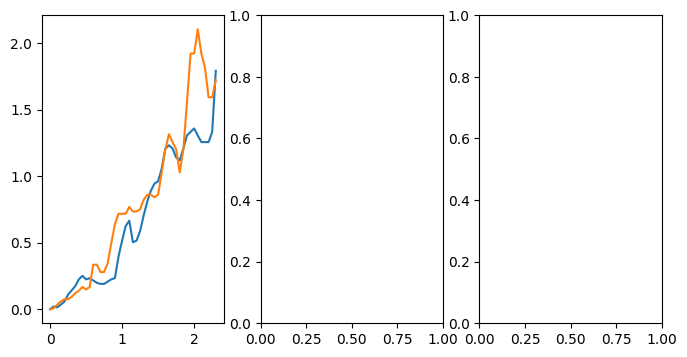

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

hour = list(df['Hour'])
a1 = list(df['A First Decay'])
a2 = list(df['A Second Decay'])
a3 = list(df['A Third Decay'])

hours = list(df['Hours'])
r1 = list(df['R First Decay'])
r2 = list(df['R Second Decay'])
r3 = list(df['R Third Decay'])
r4 = list(df['R Fourth Decay'])

t1 = list(df['T First Decay'])


# m_a1, _ = np.polyfit(hour, a1, 1)
# m_a2, _ = np.polyfit(hour, a2, 1)
axs[0].plot(hour, a1, label='A')
axs[0].plot(hour, a2, label='A')


# m_r1, _ = np.polyfit(hours, r1, 1)
axs[1].plot(hours, r1, color='tab:blue', label=str(round(m_r1,3)))
# axs[1].plot(np.asarray(hours), m_r1*np.asarray(hours), color='tab:blue', linestyle='--')

# m_r2, _ = np.polyfit(hours, r2, 1)
axs[1].plot(hours, r2, color='tab:orange', label=str(round(m_r2,3)))
# axs[1].plot(np.asarray(hours), m_r2*np.asarray(hours), color='tab:orange', linestyle='--')

# m_r3, _ = np.polyfit(hours, r3, 1)
axs[1].plot(hours, r3, color='tab:green', label=str(round(m_r3,3)))
# axs[1].plot(np.asarray(hours), m_r3*np.asarray(hours), color='tab:green', linestyle='--')

# m_r4, _ = np.polyfit(hours, r4, 1)
axs[1].plot(hours, r4, color='tab:purple', label=str(round(m_r4,3)))
# axs[1].plot(np.asarray(hours), m_r4*np.asarray(hours), color='tab:purple', linestyle='--')


# m_t1, _ = np.polyfit(hours, t1, 1)
# axs[2].plot(hours, t1, color='tab:blue')
axs[2].plot(hours, t1, color='tab:blue', label=str(round(m_t1,3)))
# axs[2].plot(np.asarray(hours), m_t1*np.asarray(hours), color='tab:blue', linestyle='--')

ylim = 2.5
fontsize1 = 6
axs[0].set_ylim([0, ylim])
axs[1].set_ylim([0, ylim])
axs[2].set_ylim([0, ylim])

axs[0].legend(fontsize=fontsize1)
axs[1].legend(fontsize=fontsize1)
axs[2].legend(fontsize=fontsize1)

axs[1].set_yticks([])
axs[2].set_yticks([])

axs[0].set_ylabel('-ln((C(t)-C out)/(C(t=0)-C out))')
axs[0].set_xlabel('Hours')
axs[1].set_xlabel('Hours')
axs[2].set_xlabel('Hours')

axs[0].set_title('House A')
axs[1].set_title('House R')
axs[2].set_title('House T')

fig.suptitle('Estimating ACH from CO2 Decay')